In [257]:
import pandas as pd
import re #정규표현식 전처리
import matplotlib.pyplot as plt #시각화
import numpy as np
import datetime

from matplotlib import font_manager, rc #한글폰트
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [177]:
vod_1 = pd.read_csv('C:\\Users\\userpc\\00_Data\\LG\\1. 데이터 인코딩\\vod_20240101.csv', encoding='cp949')
vod_2 = pd.read_csv('C:\\Users\\userpc\\00_Data\\LG\\1. 데이터 인코딩\\vod_20240201.csv', encoding='cp949')
vod_3 = pd.read_csv('C:\\Users\\userpc\\00_Data\\LG\\1. 데이터 인코딩\\vod_20240301.csv', encoding='cp949')
vod = pd.concat([vod_1, vod_2, vod_3], axis=0)

In [178]:
vod

,Unnamed: 0,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,4,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,0:01,2.020000e+13
1,120,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,2.020000e+13
2,121,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,2.020000e+13
3,363,65198000,야구장 가는날,키즈,기타,840,인기 작가 김영진 작가 신작. 야구보다 치킨이 더 좋은 그린이와 열혈 야구팬 아빠가...,-,0:14,2.020000e+13
4,558,60527000,타요의 씽씽극장 동요2 11회,키즈,기타,120,겨울 친구. 하얗게 반짝이는 눈이 펑펑 내렸어요. 썰매도 타고 눈싸움도 해볼까요? ...,-,0:02,2.020000e+13
...,...,...,...,...,...,...,...,...,...,...
7775,7776,66556000,괴물(2023)(예고),영화,드라마,5,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13
7776,7777,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13
7777,7778,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13
7778,7779,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13


# 전처리

In [179]:
# 불필요한 컬럼제거 
vod.drop(['Unnamed: 0'], axis=1, inplace=True)

In [180]:
# 로그데이터 datetime으로 만들기
vod['strt_dt'].unique()

array([2.02000000e+13, 2.02402192e+13, 2.02402141e+13, ...,
       2.02403301e+13, 2.02403302e+13, 2.02403302e+13])

In [181]:
vod.replace(2.02000000e+13, np.nan, inplace=True)

In [182]:
date = pd.to_datetime(vod.strt_dt, format = "%Y%m%d%H%M%S")
vod['datetime'] = date

In [183]:
vod['day'] = vod['datetime'].apply(lambda x : x.day)
vod['day'].fillna(-1, inplace=True)
vod['day'] = vod['day'].astype(int)

vod['hour'] = vod['datetime'].apply(lambda x : x.hour)
vod['hour'].fillna(-1, inplace=True)
vod['hour'] = vod['hour'].astype(int)

In [184]:
vod.reset_index(drop=True, inplace=True)

In [185]:
vod

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,datetime,day,hour
0,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,0:01,NaN,NaT,-1,-1
1,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,NaN,NaT,-1,-1
2,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,NaN,NaT,-1,-1
3,65198000,야구장 가는날,키즈,기타,840,인기 작가 김영진 작가 신작. 야구보다 치킨이 더 좋은 그린이와 열혈 야구팬 아빠가...,-,0:14,NaN,NaT,-1,-1
4,60527000,타요의 씽씽극장 동요2 11회,키즈,기타,120,겨울 친구. 하얗게 반짝이는 눈이 펑펑 내렸어요. 썰매도 타고 눈싸움도 해볼까요? ...,-,0:02,NaN,NaT,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
22552,66556000,괴물(2023)(예고),영화,드라마,5,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-14 13:17:34,14,13
22553,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-10 19:05:08,10,19
22554,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13,2024-03-30 10:39:45,30,10
22555,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13,2024-03-30 17:16:45,30,17


In [186]:
# 00:00 형식의 datetiem -> n분으로 변경
vod['disp_m'] = vod['disp_rtm'].dropna().apply(lambda x: int(str(x).split(':')[0]) * 60 + int(str(x).split(':')[1]) if ':' in str(x) else float('nan'))

In [187]:
# 실수형 -> 정수형 형변환
vod['disp_m'] = vod['disp_m'].fillna(0).astype(int)

In [169]:
# 5분 이하의 display time 제거
drop_5m_vod = vod[vod['disp_m'] < 5]
drop_5m_vod

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,datetime,day,hour,disp_m
0,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,0:01,NaN,NaT,-1,-1,1
4,60527000,타요의 씽씽극장 동요2 11회,키즈,기타,120,겨울 친구. 하얗게 반짝이는 눈이 펑펑 내렸어요. 썰매도 타고 눈싸움도 해볼까요? ...,-,0:02,NaN,NaT,-1,-1,2
5,60527000,타요의 씽씽극장 동요2 11회,키즈,기타,120,겨울 친구. 하얗게 반짝이는 눈이 펑펑 내렸어요. 썰매도 타고 눈싸움도 해볼까요? ...,-,0:02,NaN,NaT,-1,-1,2
7,65872000,핑크퐁 율동동요 04회,키즈,기타,60,멋쟁이 토마토. 베스트 인기 동요 멋쟁이 토마토에 맞춰 핑크퐁과 호기와 신나게 노래...,-,0:01,NaN,NaT,-1,-1,1
8,65872000,핑크퐁 율동동요 04회,키즈,기타,60,멋쟁이 토마토. 베스트 인기 동요 멋쟁이 토마토에 맞춰 핑크퐁과 호기와 신나게 노래...,-,0:01,NaN,NaT,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,66556000,괴물(2023)(예고),영화,드라마,56,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-14 13:17:39,14,13,1
22552,66556000,괴물(2023)(예고),영화,드라마,5,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-14 13:17:34,14,13,1
22553,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-10 19:05:08,10,19,1
22554,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13,2024-03-30 10:39:45,30,10,1


In [170]:
# 원본에서 삭제
vod = vod.drop(drop_5m_vod.index, axis=0)

In [171]:
# 프로그램 이름 정규화 함수
def normalize_program_name(name):
    # 회차 제거 (모범택시 2(10회) -> 모범택시 2)
    name = re.sub(r'\d+회', '', name)
    # (예고) 제거
    name = re.sub(r'\(.*?\)', '', name)
    # 대괄호 제거 ([설 특집 영화]비공식작전 -> 비공식작전)
    name = re.sub(r'\[.*?\]', '', name).strip()
    return name

In [172]:
# 프로그램 이름 정규화 적용
vod['asset_nm'] = vod['asset_nm'].apply(normalize_program_name)

In [173]:
# 사라졌는지 확인
vod[vod['asset_nm'].str.contains('2회')]

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,datetime,day,hour,disp_m


In [174]:
# 중복 제거
vod = vod.drop_duplicates()
vod.reset_index(drop=True, inplace=True)

In [175]:
vod.to_csv('vod+19.csv')

# 데이터 탐색

### 1. 시간대별VOD 시청자수

In [142]:
vod_1 = vod.copy()

In [143]:
def grouping_hour(hour) :
    if 0 <= hour <=2 :
        hour = '오전 12시-오전 3시'
    elif 3<= hour <= 5 :
        hour = '오전 3시~오전 6시'
    elif 6 <= hour <= 8 :
        hour = '오전 6시~오전 9시'
    elif 9 <= hour <= 11 :
        hour = '오전 9시~오후 12시'
    elif 12 <= hour <= 14 :
        hour = '오후 12시~오후 3시'
    elif 15 <= hour <= 17 :
        hour = '오후 3시~오후 6시'
    elif 18 <= hour <= 20 :
        hour = '오후 6시~오후 9시'
    elif 21 <= hour <= 24 :
        hour = '오후 9시~오후 12시'
    else :
        hour = np.nan
    return hour

In [144]:
def grouping_weekday(weekday) :
    if 0 <= weekday <=5 :
        weekday = '주중'
    elif 6<= weekday <= 7 :
        weekday = '주말'
    else :
        weekday = np.nan
    return weekday

In [145]:
vod_1['start_date'] = vod_1['datetime'].dt.date  #2024-01-01 형식
vod_1['start_date'] = pd.to_datetime(vod['start_date'])  #datetime 형변환

In [146]:
vod_1['weekday'] = vod_1['start_date'].dt.weekday
vod_1['weekday']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
20905    1.0
20906    5.0
20907    5.0
20908    3.0
20909    5.0
Name: weekday, Length: 20910, dtype: float64

In [148]:
vod_1['weekday_label'] = vod_1['weekday'].apply(grouping_weekday)
vod_1['weekday_label'].unique()

array([nan, '주중', '주말'], dtype=object)

In [149]:
vod_1['start_time'] = vod_1['datetime'].dt.time  #2024-01-01 형식

In [150]:
vod_1['start_time'] = pd.to_datetime(vod['start_time'], format='%H:%M:%S')

In [151]:
vod_1['start_hour'] = vod_1['start_time'].dt.hour
vod_1['start_hour']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
20905    20.0
20906    23.0
20907    23.0
20908     3.0
20909    16.0
Name: start_hour, Length: 20910, dtype: float64

In [152]:
vod_1['hour_label'] = vod_1['viewing_start_hour'].apply(grouping_hour)
vod_1['hour_label']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
20905     오후 6시~오후 9시
20906    오후 9시~오후 12시
20907    오후 9시~오후 12시
20908     오전 3시~오전 6시
20909     오후 3시~오후 6시
Name: hour_label, Length: 20910, dtype: object

In [153]:
vod_df = vod_1[['hour_label', 'weekday_label','subsr']]

vod_pivot = pd.pivot_table(vod_df, index=['weekday_label', 'hour_label'], values = 'subsr', aggfunc='count')

vod_pivot.sort_values(by = 'subsr', ascending= False)

vod_pivot_weekday = vod_pivot.loc['주중'].sort_values(by = 'hour_label')
vod_pivot_weekend = vod_pivot.loc['주말'].sort_values(by = 'hour_label')

In [154]:
vod_pivot

subsr
weekday_label hour_label         
주말            오전 12시-오전 3시    184
              오전 3시~오전 6시     100
              오전 6시~오전 9시     252
              오전 9시~오후 12시    288
              오후 12시~오후 3시    306
              오후 3시~오후 6시     448
              오후 6시~오후 9시     368
              오후 9시~오후 12시    302
주중            오전 12시-오전 3시   1377
              오전 3시~오전 6시     827
              오전 6시~오전 9시    1217
              오전 9시~오후 12시   1541
              오후 12시~오후 3시   1577
              오후 3시~오후 6시    1858
              오후 6시~오후 9시    2037
              오후 9시~오후 12시   1805

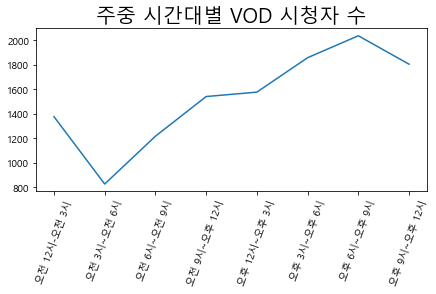

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
#x축 눈금 라벨 회전
plt.xticks(size=10, rotation= 70)
plt.title('주중 시간대별 VOD 시청자 수', size=20)
plt.plot(vod_pivot_weekday.index, vod_pivot_weekday.values)
plt.show()

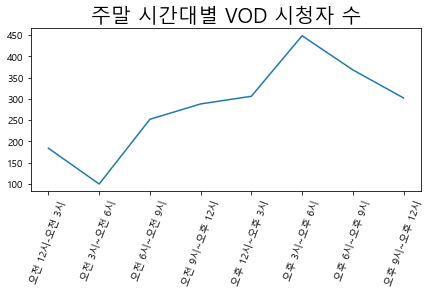

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 3))
#x축 눈금 라벨 회전
plt.xticks(size=10, rotation= 70)
plt.title('주말 시간대별 VOD 시청자 수', size=20)
plt.plot(vod_pivot_weekend.index, vod_pivot_weekend.values)
plt.show()

### 2. 가장 많이 본 프로그램

In [134]:
vod_2 = vod[['asset_nm', 'ct_cl', 'genre_of_ct_cl', 'disp_m']]
vod_2.head()

,asset_nm,ct_cl,genre_of_ct_cl,disp_m
0,깨비키즈 공룡스토리,키즈,기타,5
1,야구장 가는날,키즈,기타,14
2,위키와 동물 언어-한국어교육,키즈,기타,11
3,헤이지니 럭키강이 시즌13 스페셜.,키즈,기타,13
4,엘리가간다 시즌7,키즈,기타,10


In [130]:
#가장 많이 본 VOD 카테고리
vod_2.ct_cl.value_counts()

TV드라마       8071
영화          4896
TV 연예/오락    3292
기타          2723
TV 시사/교양     818
TV애니메이션      660
키즈           346
다큐            53
스포츠           26
우리동네          23
미분류            2
Name: ct_cl, dtype: int64

In [131]:
#가장 많이 본 VOD 장르
vod_2.genre_of_ct_cl.value_counts()

기타          10890
외화 시리즈       4490
성인           1207
액션/어드벤쳐      1200
드라마           968
애니메이션         412
코미디           365
멜로            259
공포/스릴러        237
인물/다큐         156
명랑/코믹         151
액션/모험         126
무협             89
SF/환타지         85
학습             45
오락             33
다큐멘터리          32
레슬링            26
인물             26
추리/미스터리        26
연예/오락          23
동물             16
로맨틱코미디         14
무협/환타지          7
역사              7
자연              6
호러/공포           4
학원/순정/연애        4
단편              4
미분류             2
Name: genre_of_ct_cl, dtype: int64

In [133]:
#가장 많이 본 VOD 프로그램
vod_2.asset_nm.value_counts().head(30)

아내의 속사정:음란한 거래    503
남편은 이렇게 못해줘       359
런닝맨               341
색에 놀다             292
세 번째 결혼           286
꼬리에꼬리를무는그날이야기     282
내딸서영이             282
밤에 피는 꽃           231
효심이네 각자도생         204
우당탕탕 패밀리          183
미운우리새끼            158
쾌락의 밤             148
섹스 앤 머니           145
낭만닥터 김사부3         141
놀면 뭐하니?           141
가족끼리 왜 이래         131
한문철의 블랙박스 리뷰      122
서울의 봄             118
안락전 .             116
나 혼자산다            115
재벌X형사             113
신발 벗고 돌싱포맨        109
미스터 로또            107
육남매               104
연화루 .             101
도둑놈 도둑님           101
성한찬란 .             99
천고결진 .             98
귀공자                95
개는 훌륭하다            94
Name: asset_nm, dtype: int64

In [139]:
# 가장 오래 시청한 VOD 장르
group = vod_2.groupby('genre_of_ct_cl')

for program_name, group_data in group:
    result = group['disp_m'].agg(['sum', 'mean']).reset_index()
    result_sorted = result.sort_values(by='sum', ascending=False)

result_sorted.head(10)

,genre_of_ct_cl,sum,mean
2,기타,727544,66.808448
21,외화 시리즈,199789,44.496437
17,액션/어드벤쳐,132078,110.065000
6,드라마,112848,116.578512
14,성인,66327,54.951947
26,코미디,39753,108.912329
15,애니메이션,32080,77.864078
9,멜로,28635,110.559846
1,공포/스릴러,26742,112.835443
23,인물/다큐,12447,79.788462


In [136]:
# 가장 오래 시청한 VOD 프로그램
group = vod_2.groupby('asset_nm')

for program_name, group_data in group:
    result = group['disp_m'].agg(['sum', 'mean']).reset_index()
    result_sorted = result.sort_values(by='sum', ascending=False)

In [137]:
result_sorted.head(10)

,asset_nm,sum,mean
1446,아내의 속사정:음란한 거래,32192,64.000000
704,런닝맨,31629,92.753666
427,남편은 이렇게 못해줘,21540,60.000000
347,꼬리에꼬리를무는그날이야기,21033,74.585106
1190,색에 놀다,19564,67.000000
464,내딸서영이,17698,62.758865
1203,서울의 봄,16756,142.000000
2307,쾌락의 밤,16428,111.000000
937,미운우리새끼,16161,102.284810
972,밤에 피는 꽃,15269,66.099567


### 3. 예고 시청이 실제 본 컨텐츠 시청에 영향을 미치는지(3분 미만이 예고 영상)

In [191]:
vod_3 = vod.copy()
vod_3

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,datetime,day,hour,disp_m
0,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,0:01,NaN,NaT,-1,-1,1
1,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,NaN,NaT,-1,-1,5
2,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,NaN,NaT,-1,-1,5
3,65198000,야구장 가는날,키즈,기타,840,인기 작가 김영진 작가 신작. 야구보다 치킨이 더 좋은 그린이와 열혈 야구팬 아빠가...,-,0:14,NaN,NaT,-1,-1,14
4,60527000,타요의 씽씽극장 동요2 11회,키즈,기타,120,겨울 친구. 하얗게 반짝이는 눈이 펑펑 내렸어요. 썰매도 타고 눈싸움도 해볼까요? ...,-,0:02,NaN,NaT,-1,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22552,66556000,괴물(2023)(예고),영화,드라마,5,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-14 13:17:34,14,13,1
22553,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-10 19:05:08,10,19,1
22554,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13,2024-03-30 10:39:45,30,10,1
22555,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13,2024-03-30 17:16:45,30,17,1


In [221]:
vod_3['preview'] = vod_3['asset_nm'].str.contains("\(예고\)", na=False)
vod_3

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt,datetime,day,hour,disp_m,preview
0,66437000,콩순이 율동교실 4기 01회,키즈,기타,60,콩순이 아이스크림 좋아송. 아이스크림 너무 좋아~! 콩순이와 친구들이 함께 부르는 ...,콩순이,0:01,NaN,NaT,-1,-1,1,False
1,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,NaN,NaT,-1,-1,5,False
2,63086000,깨비키즈 공룡스토리 23회,키즈,기타,300,집을 잃은 티라 상. 아랫마을에 아주 성질이 더러운 스피노라는 육식동물이 나타났어요...,-,0:05,NaN,NaT,-1,-1,5,False
3,65198000,야구장 가는날,키즈,기타,840,인기 작가 김영진 작가 신작. 야구보다 치킨이 더 좋은 그린이와 열혈 야구팬 아빠가...,-,0:14,NaN,NaT,-1,-1,14,False
4,60527000,타요의 씽씽극장 동요2 11회,키즈,기타,120,겨울 친구. 하얗게 반짝이는 눈이 펑펑 내렸어요. 썰매도 타고 눈싸움도 해볼까요? ...,-,0:02,NaN,NaT,-1,-1,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22552,66556000,괴물(2023)(예고),영화,드라마,5,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-14 13:17:34,14,13,1,True
22553,63086000,괴물(2023)(예고),영화,드라마,60,싱글맘 사오리는 아들 미나토의 행동에서 이상 기운을 감지한다. 용기를 내 찾아간 학...,"안도 사쿠라,다나카 유코,나가야마 에이타,쿠로카와 소야,히이라기 히나타",00:01,2.024031e+13,2024-03-10 19:05:08,10,19,1,True
22554,63017000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13,2024-03-30 10:39:45,30,10,1,True
22555,66056000,만난지3분만에합체 저랑섹스한번하실래요(예고),영화,성인,60,일본 최고의 색녀 시노다 아유미는 마음대로 골라 먹는다. 길거리를 돌아다니며 즉석에...,시노다 아유미,00:01,2.024033e+13,2024-03-30 17:16:45,30,17,1,True


In [237]:
vod_3['preview'].value_counts()

False    21318
True      1239
Name: preview, dtype: int64

In [259]:
# 프로그램 이름 정규화 함수
def normalize_program_name(name):
    # 회차 제거 (모범택시 2(10회) -> 모범택시 2)
    name = re.sub(r'\d+회', '', name)
    # (예고) 제거
    name = re.sub(r'\(.*?\)', '', name)
    # 대괄호 제거 ([설 특집 영화]비공식작전 -> 비공식작전)
    name = re.sub(r'\[.*?\]', '', name).strip()
    return name

In [260]:
df = vod_3[['subsr', 'asset_nm', 'datetime', 'disp_rtm', 'disp_m', 'preview']]
df.head()

,subsr,asset_nm,datetime,disp_rtm,disp_m,preview
0,66437000,콩순이 율동교실 4기 01회,NaT,0:01,1,False
1,63086000,깨비키즈 공룡스토리 23회,NaT,0:05,5,False
2,63086000,깨비키즈 공룡스토리 23회,NaT,0:05,5,False
3,65198000,야구장 가는날,NaT,0:14,14,False
4,60527000,타요의 씽씽극장 동요2 11회,NaT,0:02,2,False


In [261]:
df['asset_nm'] = df['asset_nm'].apply(normalize_program_name)
df

<ipython-input-261-1cc1c43c5aa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['asset_nm'] = df['asset_nm'].apply(normalize_program_name)


,subsr,asset_nm,datetime,disp_rtm,disp_m,preview
0,66437000,콩순이 율동교실 4기,NaT,0:01,1,False
1,63086000,깨비키즈 공룡스토리,NaT,0:05,5,False
2,63086000,깨비키즈 공룡스토리,NaT,0:05,5,False
3,65198000,야구장 가는날,NaT,0:14,14,False
4,60527000,타요의 씽씽극장 동요2,NaT,0:02,2,False
...,...,...,...,...,...,...
22552,66556000,괴물,2024-03-14 13:17:34,00:01,1,True
22553,63086000,괴물,2024-03-10 19:05:08,00:01,1,True
22554,63017000,만난지3분만에합체 저랑섹스한번하실래요,2024-03-30 10:39:45,00:01,1,True
22555,66056000,만난지3분만에합체 저랑섹스한번하실래요,2024-03-30 17:16:45,00:01,1,True


In [276]:
df.preview.value_counts()

False    21318
True      1239
Name: preview, dtype: int64

In [318]:
df['datetime'] = pd.to_datetime(df['datetime'])

def count_later_dates(group):
    max_datetime_preview_true = group[group['preview']]['datetime'].max()
    return (group['datetime'] > max_datetime_preview_true).sum()

<ipython-input-318-d6dfa5a1a087>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])


In [319]:
result = df.groupby('asset_nm').apply(count_later_dates)

In [320]:
result[result>0].sort_values(ascending=False)

asset_nm
귀공자                      88
불륜 : 행복은 다른 곳에 있다        23
하룻밤                      23
뮬란                       18
나폴레옹                     16
                         ..
새엄마는 내 휴지 도둑              1
옆집 영계냄새에 발딱 선 내 아내        1
여자감옥: 무법지대                1
여곡성                       1
흑인 거근에 나락 가버린 아내 무삭제판     1
Length: 74, dtype: int64

#### 총 1239개 정도에서 74개 정도의 영향. 미미함

### 4. contents 페이지에 머무른 시간이 실제 시청 시간에 영향을 미치는지

In [410]:
vod_4 = vod[['subsr', 'asset_nm', 'disp_m', 'datetime', 'strt_dt']]
vod_4.head()

,subsr,asset_nm,disp_m,datetime,strt_dt
0,66437000,콩순이 율동교실 4기 01회,1,NaT,NaN
1,63086000,깨비키즈 공룡스토리 23회,5,NaT,NaN
2,63086000,깨비키즈 공룡스토리 23회,5,NaT,NaN
3,65198000,야구장 가는날,14,NaT,NaN
4,60527000,타요의 씽씽극장 동요2 11회,2,NaT,NaN


In [411]:
vod_4.dropna(subset = ['strt_dt'], inplace=True)

<ipython-input-411-920cc5b0a7a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_4.dropna(subset = ['strt_dt'], inplace=True)


In [418]:
vod_4.drop(vod_4[vod_4['disp_m'] < 3].index, inplace=True)

C:\Users\userpc\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [357]:
contents_1 = pd.read_csv('C:\\Users\\userpc\\00_Data\\LG\\1. 데이터 인코딩\\contents_20240101.csv', encoding='cp949')
contents_2 = pd.read_csv('C:\\Users\\userpc\\00_Data\\LG\\1. 데이터 인코딩\\contents_20240201.csv', encoding='cp949')
contents_3 = pd.read_csv('C:\\Users\\userpc\\00_Data\\LG\\1. 데이터 인코딩\\contents_20240301.csv', encoding='cp949')
contents = pd.concat([contents_1, contents_2, contents_3], axis=0)

In [358]:
contents['log_dt'] == 20240100000000
contents.replace(2.02401000e+13, np.nan, inplace=True)
date = pd.to_datetime(contents.log_dt, format = "%Y%m%d%H%M%S")
contents['datetime'] = date

In [359]:
contents.reset_index(drop=True, inplace=True)

In [360]:
# 00:00 형식의 datetiem -> n분으로 변경
contents['disp_m'] = contents['disp_rtm'].dropna().apply(lambda x: int(str(x).split(':')[0]) * 60 + int(str(x).split(':')[1]) if ':' in str(x) else float('nan'))

In [373]:
contents_4 = contents[['subsr', 'super_asset_nm', 'disp_m', 'datetime', 'log_dt']]

In [389]:
contents_4.dropna(subset = ['log_dt'], inplace=True)

<ipython-input-389-a57a783e2654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents_4.dropna(subset = ['log_dt'], inplace=True)


In [431]:
vod_4.head(50)

,subsr,asset_nm,disp_m,datetime,strt_dt
7007,61080000,극적인하룻밤,107,2024-02-19 19:38:56,2.024022e+13
7008,64386000,극적인하룻밤,107,2024-02-14 08:24:29,2.024021e+13
7009,61779000,극적인하룻밤,107,2024-02-20 22:05:35,2.024022e+13
7010,66056000,극적인하룻밤,107,2024-02-08 14:47:49,2.024021e+13
7011,62226000,극적인하룻밤,107,2024-02-12 16:13:01,2.024021e+13
7012,61080000,극적인하룻밤,107,2024-02-18 01:04:39,2.024022e+13
7013,67164000,극적인하룻밤,107,2024-02-16 20:48:22,2.024022e+13
7014,67164000,극적인하룻밤,107,2024-02-16 21:07:19,2.024022e+13
7015,60607000,극적인하룻밤,107,2024-02-17 00:30:35,2.024022e+13
7016,67164000,극적인하룻밤,107,2024-02-16 20:57:57,2.024022e+13


In [434]:
vod_4[(vod_4['subsr'] == 64520000) & (vod_4['asset_nm'].str.contains(''))]



,subsr,asset_nm,disp_m,datetime,strt_dt
7057,64520000,(FREE)귀공자(무료),118,2024-02-04 14:56:29,2.024020e+13
7078,64520000,(FREE)귀공자(무료),118,2024-02-05 15:28:10,2.024021e+13
7134,64520000,(FREE)귀공자(무료),118,2024-02-04 15:43:41,2.024020e+13
9264,64520000,꼬리에꼬리를무는그날이야기 112회(24/01/25),81,2024-02-15 20:03:19,2.024022e+13
9266,64520000,꼬리에꼬리를무는그날이야기 112회(24/01/25),81,2024-02-24 20:28:21,2.024022e+13
9267,64520000,꼬리에꼬리를무는그날이야기 112회(24/01/25),81,2024-02-24 20:28:40,2.024022e+13
9268,64520000,꼬리에꼬리를무는그날이야기 112회(24/01/25),81,2024-02-15 15:31:29,2.024022e+13
9273,64520000,꼬리에꼬리를무는그날이야기 112회(24/01/25),81,2024-02-25 19:49:31,2.024023e+13
9274,64520000,꼬리에꼬리를무는그날이야기 112회(24/01/25),81,2024-02-25 19:49:46,2.024023e+13
10509,64520000,꼬리에꼬리를무는그날이야기 113회(24/02/01),70,2024-02-24 20:25:02,2.024022e+13


In [435]:
contents_4[(contents_4['subsr'] == 64520000) & (contents_4['super_asset_nm'].str.contains(''))]

,subsr,super_asset_nm,disp_m,datetime,log_dt
24366,64520000,귀공자,118.0,2024-02-04 14:56:57,2.024020e+13
24373,64520000,귀공자,118.0,2024-02-04 14:56:24,2.024020e+13
25066,64520000,꼬리에꼬리를무는그날이야기 116회,65.0,2024-02-24 20:24:51,2.024022e+13
31087,64520000,2023 런닝맨 게스트 어워즈 1회,93.0,2024-02-29 18:40:49,2.024023e+13
31649,64520000,꼬리에 꼬리를 무는 그날 이야기 2 21회,74.0,2024-02-07 19:31:51,2.024021e+13
31652,64520000,꼬리에 꼬리를 무는 그날 이야기 2 21회,74.0,2024-02-24 20:24:35,2.024022e+13
31655,64520000,꼬리에 꼬리를 무는 그날 이야기 2 21회,74.0,2024-02-15 20:03:07,2.024022e+13
32763,64520000,런닝맨 587회,87.0,2024-02-29 18:40:54,2.024023e+13
33917,64520000,꼬리에꼬리를무는그날이야기 64회,77.0,2024-02-24 20:24:18,2.024022e+13
34101,64520000,서울의 봄,142.0,2024-02-12 13:12:16,2.024021e+13


#### 상세페이지 접속 로그 데이터가 어떤 이유에선지 잦다.
#### 그래서 접속 시간과 시청 시작 사이의 계산 기준점을 잡기가 어려운데
#### 일단 대강 첫 접속 로그와 첫 시청 시작 사이로 계산해보자

In [552]:
# 프로그램 이름 정규화 함수
def normalize_program_name(name):
    # 회차 제거 (모범택시 2(10회) -> 모범택시 2)
    name = re.sub(r'\d+회', '', name)
    # (예고) 제거
    name = re.sub(r'\(.*?\)', '', name)
    # 대괄호 제거 ([설 특집 영화]비공식작전 -> 비공식작전)
    name = re.sub(r'\[.*?\]', '', name).strip()
    return name

In [553]:
contents_4['super_asset_nm'] = contents_4['super_asset_nm'].apply(normalize_program_name)
vod_4['asset_nm'] = vod_4['asset_nm'].apply(normalize_program_name)

<ipython-input-553-fda0cd1ec456>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contents_4['super_asset_nm'] = contents_4['super_asset_nm'].apply(normalize_program_name)
<ipython-input-553-fda0cd1ec456>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vod_4['asset_nm'] = vod_4['asset_nm'].apply(normalize_program_name)


In [554]:
first_access_times = contents_4.groupby(['subsr', 'super_asset_nm'])['log_dt'].min()
first_start_times = vod_4.groupby(['subsr', 'asset_nm'])['strt_dt'].min()

In [555]:
data = {
    'first_access_times' : first_access_times,
    'first_start_times' : first_start_times
}
df = pd.DataFrame(data)

In [556]:
df

first_access_times  first_start_times
59880000 도그데이즈                     2.024031e+13                NaN
59882000 한글용사 아이야 시즌3              2.024032e+13                NaN
59883000 마크맨                       2.024022e+13                NaN
         서울의 봄                     2.024022e+13                NaN
         어벤지먼트                     2.024022e+13                NaN
...                                         ...                ...
67400000 아내 대신 채워준 야한 장모님          2.024033e+13                NaN
         유산으로 남겨준 새엄마              2.024033e+13                NaN
         조건섹스 : 라스트 원나잇            2.024033e+13                NaN
         편의점 털다 아랫도리 털린 유부녀        2.024033e+13                NaN
         형수: 불륜관계                  2.024033e+13                NaN

[16164 rows x 2 columns]

In [549]:
df.dropna()

first_access_times  first_start_times
59883000 위험한상견례                2.024022e+13       2.024022e+13
         표적                    2.024022e+13       2.024022e+13
59890000 건강 체조                 2.024022e+13       2.024022e+13
59892000 그녀도 여친2               2.024022e+13       2.024022e+13
59899000 0시                    2.024030e+13       2.024030e+13
...                                     ...                ...
67356000 블라인드                  2.024032e+13       2.024032e+13
         색에 놀다                 2.024023e+13       2.024023e+13
         섹스 앤 머니               2.024023e+13       2.024023e+13
         아내의 속사정:음란한 거래        2.024031e+13       2.024031e+13
67391000 명성황후                  2.024033e+13       2.024033e+13

[2920 rows x 2 columns]

In [557]:
df = df.dropna()

In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2920 entries, (59883000, '위험한상견례') to (67391000, '명성황후')
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   first_access_times  2920 non-null   float64
 1   first_start_times   2920 non-null   float64
dtypes: float64(2)
memory usage: 493.6+ KB


In [569]:
df['first_access_times'] = pd.to_datetime(df.first_access_times, format='%Y%m%d%H%M%S')
df['first_start_times'] =pd.to_datetime(df.first_start_times, format='%Y%m%d%H%M%S')

<ipython-input-569-c5394035260b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_access_times'] = pd.to_datetime(df.first_access_times, format='%Y%m%d%H%M%S')
<ipython-input-569-c5394035260b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_start_times'] =pd.to_datetime(df.first_start_times, format='%Y%m%d%H%M%S')


In [570]:
df

first_access_times   first_start_times
59883000 위험한상견례         2024-02-15 22:55:39 2024-02-15 22:56:17
         표적             2024-02-15 22:31:11 2024-02-15 22:31:28
59890000 건강 체조          2024-02-23 16:22:43 2024-02-23 16:22:44
59892000 그녀도 여친2        2024-02-22 14:25:07 2024-02-22 14:25:27
59899000 0시             2024-03-01 21:27:32 2024-03-01 21:27:35
...                                     ...                 ...
67356000 블라인드           2024-03-18 19:36:33 2024-03-18 19:36:56
         색에 놀다          2024-02-25 19:23:45 2024-02-25 19:24:02
         섹스 앤 머니        2024-02-26 08:39:10 2024-02-26 08:39:23
         아내의 속사정:음란한 거래 2024-03-07 05:52:18 2024-03-07 05:57:48
67391000 명성황후           2024-03-28 17:04:15 2024-03-28 17:04:00

[2920 rows x 2 columns]

In [574]:
time_difference = df.first_start_times - df.first_access_times

In [575]:
time_difference

59883000  위험한상견례             0 days 00:00:38
          표적                 0 days 00:00:17
59890000  건강 체조              0 days 00:00:01
59892000  그녀도 여친2            0 days 00:00:20
59899000  0시                 0 days 00:00:03
                                  ...       
67356000  블라인드               0 days 00:00:23
          색에 놀다              0 days 00:00:17
          섹스 앤 머니            0 days 00:00:13
          아내의 속사정:음란한 거래     0 days 00:05:30
67391000  명성황후             -1 days +23:59:45
Length: 2920, dtype: timedelta64[ns]

In [577]:
df['time_difference'] = time_difference.dt.total_seconds().astype(int)

<ipython-input-577-bdce0b4594c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_difference'] = time_difference.dt.total_seconds().astype(int)


In [578]:
df

first_access_times   first_start_times  \
59883000 위험한상견례         2024-02-15 22:55:39 2024-02-15 22:56:17   
         표적             2024-02-15 22:31:11 2024-02-15 22:31:28   
59890000 건강 체조          2024-02-23 16:22:43 2024-02-23 16:22:44   
59892000 그녀도 여친2        2024-02-22 14:25:07 2024-02-22 14:25:27   
59899000 0시             2024-03-01 21:27:32 2024-03-01 21:27:35   
...                                     ...                 ...   
67356000 블라인드           2024-03-18 19:36:33 2024-03-18 19:36:56   
         색에 놀다          2024-02-25 19:23:45 2024-02-25 19:24:02   
         섹스 앤 머니        2024-02-26 08:39:10 2024-02-26 08:39:23   
         아내의 속사정:음란한 거래 2024-03-07 05:52:18 2024-03-07 05:57:48   
67391000 명성황후           2024-03-28 17:04:15 2024-03-28 17:04:00   

                         time_difference  
59883000 위험한상견례                       38  
         표적                           17  
59890000 건강 체조                         1  
59892000 그녀도 여친2                      20  
59899000 0시                            3  
...                                  ...  
67356000 블라인드                         23  
         색에 놀다                        17  
         섹스 앤 머니                      13  
         아내의 속사정:음란한 거래              330  
67391000 명성황후                        -15  

[2920 rows x 3 columns]